## **FINM 32000 - HW2**

#### Yumeng Zhang (12372205)

I discussed Problem 1 and 2 with Yitong Li.

In [35]:
import numpy as np

# Problem 1

In [36]:
class localvolDynamics:
    
    def __init__(self, S0, r, q, maxvol, localvol): 
        self.S0 = S0
        self.r = r
        self.q = q
        self.maxvol = maxvol
        self.localvol = localvol


In [37]:
hw2dynamics = localvolDynamics(S0 = 100, r = 0.06, q = 0.01, maxvol = 0.6, 
                     localvol = lambda S,t: np.minimum(0.2+5*np.log(S/100)**2+0.1*np.exp(-t), 0.6))

# Note that hw2dynamics.localvol is a function 
# that may be invoked in the usual way, for example:
# hw2dynamics.localvol( exchangerate , time )

In [38]:
class CallOnAmericanPut:

    def __init__(self, putexpiry, putstrike, callexpiry, callstrike):
        self.putexpiry = putexpiry
        self.putstrike = putstrike
        self.callexpiry = callexpiry
        self.callstrike = callstrike
        

In [39]:
hw2contract = CallOnAmericanPut(putexpiry=0.75, putstrike=95, callexpiry=0.25, callstrike=10)

In [113]:
class TrinomTree:
    
    def __init__(self, N):
        self.N = N
        
    # You complete the coding of this function
    def price_compound_localvol(self, contract, dynamics):

        deltat = contract.putexpiry / self.N

        numTimestepsPerObs = contract.callexpiry / deltat
        if abs(numTimestepsPerObs-round(numTimestepsPerObs)) > 1e-8:
            raise ValueError("This value of N fails to represent call expiry in the tree.")

        max_vol = dynamics.maxvol
        avg_vol = dynamics.localvol(dynamics.S0, 0)

        deltax = max(avg_vol * np.sqrt(3 * deltat), max_vol * np.sqrt(deltat))

        Sgrid = dynamics.S0 * np.exp(np.linspace(self.N, -self.N, num=2*self.N+1, endpoint=True)*deltax)  

        putprice = np.maximum(contract.putstrike-Sgrid, 0)   # an array of time-T put prices

        for t in np.linspace(self.N - 1, 0, num = self.N, endpoint = True) * deltat:

            Sgrid = Sgrid[1:-1]
            sigma_ = dynamics.localvol(Sgrid, t)

            nu = dynamics.r - dynamics.q - (sigma_**2)/2                                                          
            Pu = 0.5 * (((sigma_**2) * deltat + (nu**2) * (deltat**2)) / (deltax**2) + nu * deltat/deltax)      
            Pd = 0.5 * (((sigma_**2) * deltat + (nu**2) * (deltat**2)) / (deltax**2) - nu * deltat/deltax)       
            Pm = 1 - ((sigma_**2) * deltat + (nu**2) * (deltat**2)) / (deltax**2)   

            Cu = Pu * putprice[:-2]
            Cm = Pm * putprice[1:-1]
            Cd = Pd * putprice[2:]   

            putprice = np.maximum(contract.putstrike - Sgrid, np.exp((-1) * dynamics.r * deltat) * (Cu + Cm + Cd))  

            if abs(t - contract.callexpiry) < 1e-8: 

                callprice = np.maximum(putprice - contract.callstrike, 0)

            elif contract.callexpiry > t:

                # print(Pu.shape)

                Cu_ = Pu * callprice[:-2]
                Cm_ = Pm * callprice[1:-1]
                Cd_ = Pd * callprice[2:]

                callprice = np.exp((-1) * dynamics.r * deltat) * (Cu_ + Cm_ + Cd_)

        
        price_of_put = putprice[0]   # write code to compute this    

        price_of_call_on_put = callprice[0]   # write code to compute this
    
        return (price_of_put, price_of_call_on_put)
    

In [114]:
hw2tree = TrinomTree(N = 3300)  # change if necessary to get $0.01 accuracy, in your judgment

In [115]:
(answer_part_a, answer_part_b) = hw2tree.price_compound_localvol(hw2contract,hw2dynamics)

In [116]:
(answer_part_a, answer_part_b) 

(7.007262925567754, 1.5917077188116526)

##### **(a)**

In [105]:
print("The time-0 price of an American-style put on the GDC is " + str(round(answer_part_a, 4)) + ".")

The time-0 price of an American-style put on the GDC is 7.0073.


##### **(b)**

In [106]:
print("The time-0 price of a European-style call on an American put on the GDC is " + str(round(answer_part_b, 4)) + ".")

The time-0 price of a European-style call on an American put on the GDC is 1.5917.


# Problem 2

##### **(a)**

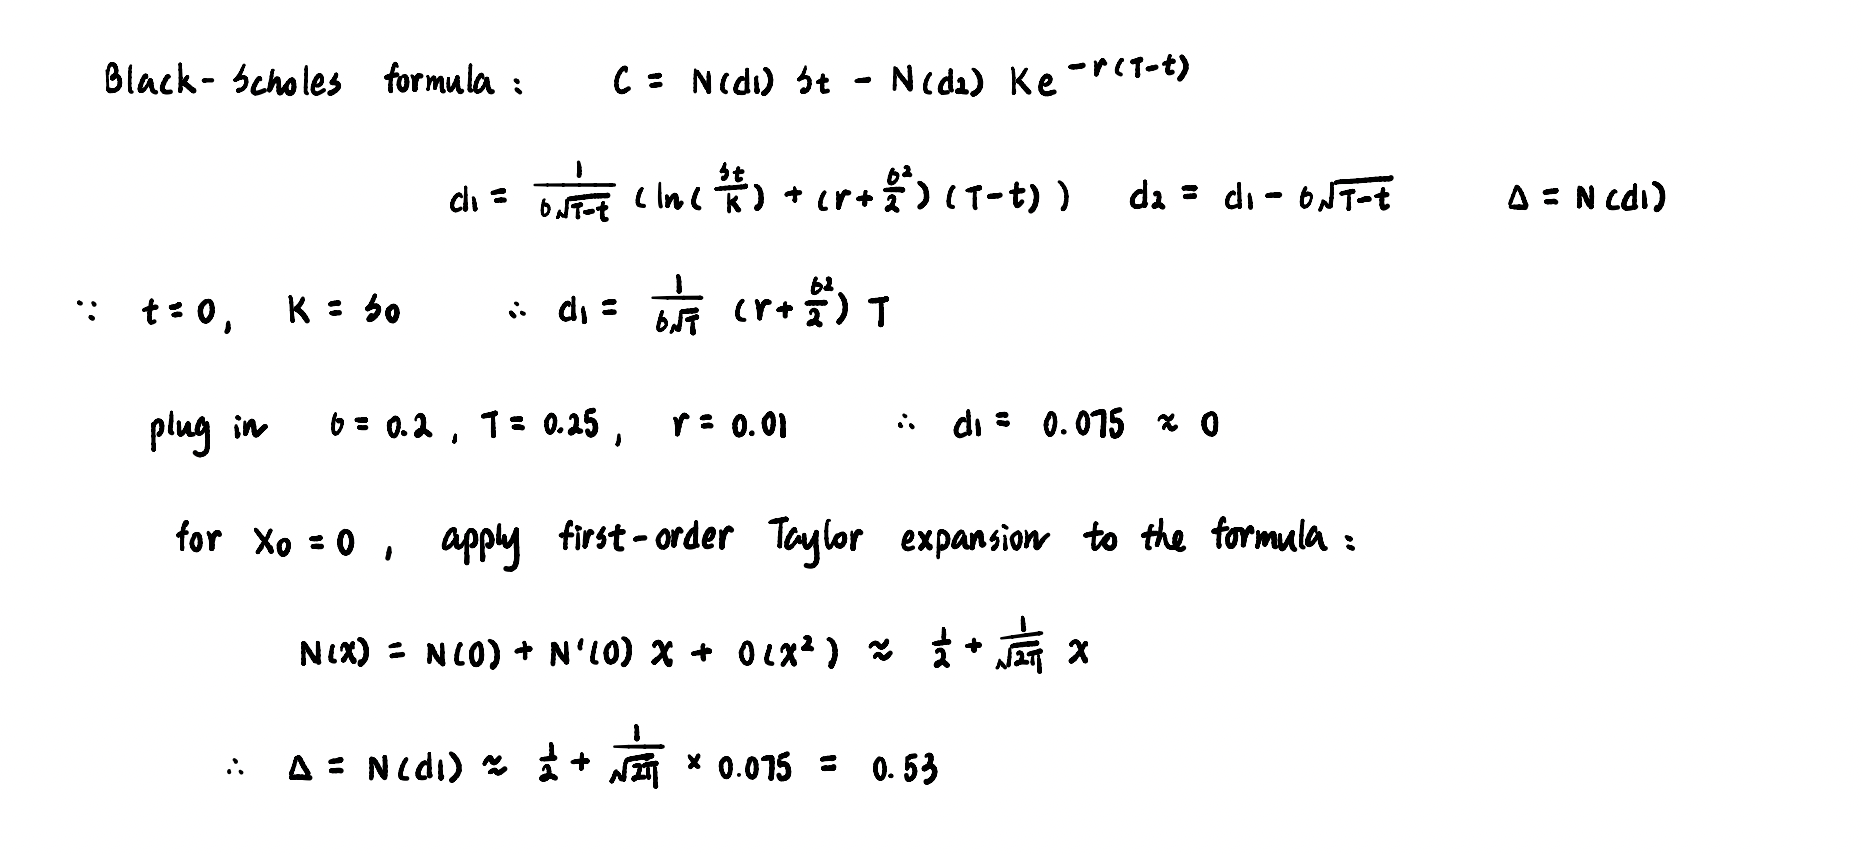

##### **(b)**

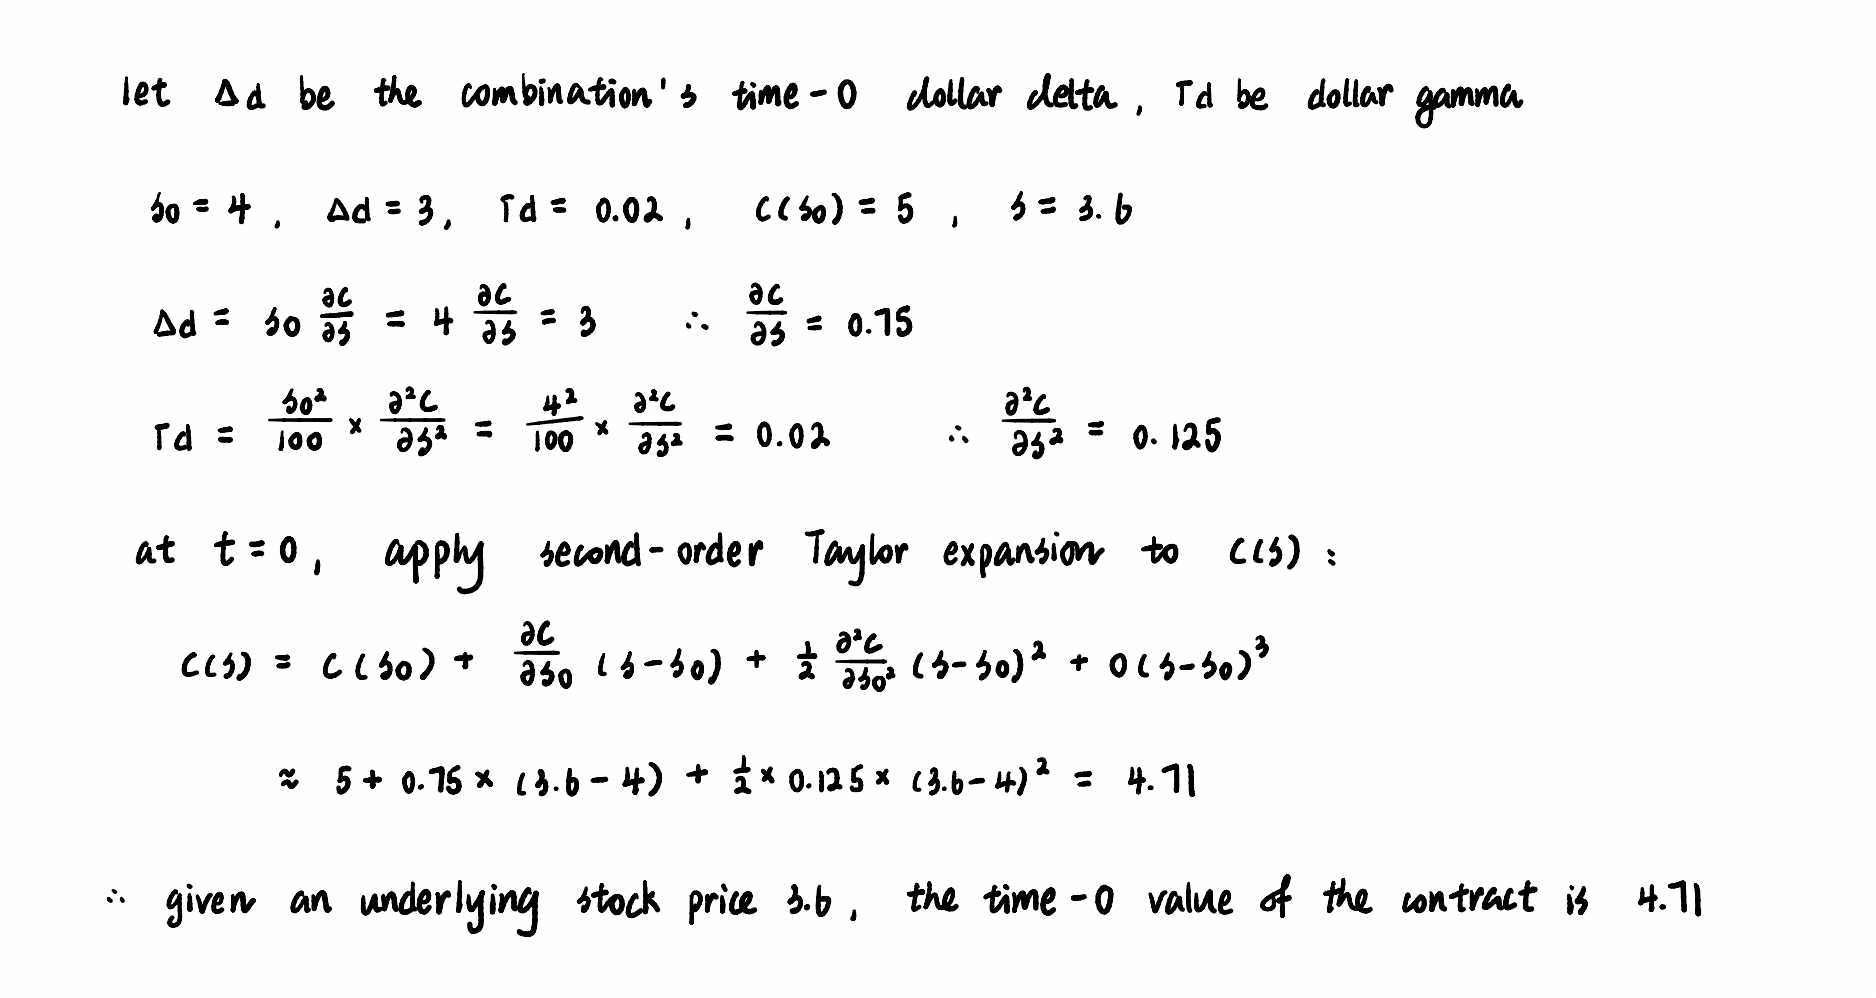